In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from scipy.signal import butter, lfilter
from scipy.signal.windows import tukey

In [2]:
def preprocess(x, fs=128):
    HIGHPASS_FILTER = butter(2, 1, 'high', fs=fs)
    LOWPASS_FILTER = butter(2, 40, 'low', fs=fs)
    FILTER_COEFFS = [
        np.convolve(HIGHPASS_FILTER[0], LOWPASS_FILTER[0]),
        np.convolve(HIGHPASS_FILTER[1], LOWPASS_FILTER[1])
    ]

    x = x * WINDOW
    x1 = lfilter(*FILTER_COEFFS, x, axis=1)
    x1 = (x1 - x1.mean())/x1.std()
    return np.concatenate([x1], axis=2).astype('float32')


WINDOW = np.expand_dims(tukey(1280, 0.05), axis=(0, 2))


In [3]:
# Funções para calcular a média móvel e a mediana móvel
def media_movel(serie, janela):
    return serie.rolling(window=janela).mean()

def mediana_movel(serie, janela):
    return serie.rolling(window=janela).median()

def func_filtros(signal, ordem_movel, show = False):
    # Criar um DataFrame do Pandas para facilitar o trabalho com séries temporais
    df = pd.DataFrame({'Valor': signal})

    # Calcular a média móvel e a mediana móvel
    df['MediaMovel'] = media_movel(df['Valor'], ordem_movel)
    df['MedianaMovel'] = mediana_movel(df['Valor'], ordem_movel)

    # Subtrair a média móvel e a mediana móvel do sinal original para remover a flutuação
    df['SinalDetrendedMedia'] = df['Valor'] - df['MediaMovel']
    df['SinalDetrendedMediana'] = df['Valor'] - df['MedianaMovel']
    
    if show:

        # Plotar o sinal original, a média móvel, a mediana móvel e os sinais detrended
        plt.figure(figsize=(12, 8))
        plt.plot(df['Valor'], label='Série Temporal Original', linestyle='--', marker='o')
        plt.plot(df['MediaMovel'], label=f'Média Móvel ({ordem_movel} pontos)')
        plt.plot(df['MedianaMovel'], label=f'Mediana Móvel ({ordem_movel} pontos)')
        plt.plot(df['SinalDetrendedMedia'], label='Sinal Detrended (Média Móvel)')
        plt.plot(df['SinalDetrendedMediana'], label='Sinal Detrended (Mediana Móvel)')
        plt.title('Comparação entre Média Móvel e Mediana Móvel')
        plt.legend()
        plt.show()
    
    return df['SinalDetrendedMedia'], df['SinalDetrendedMediana']

In [4]:
diretorio = 'D:/usuarios/estela.ribeiro/laudos/'
filename = '1j400008.h5'

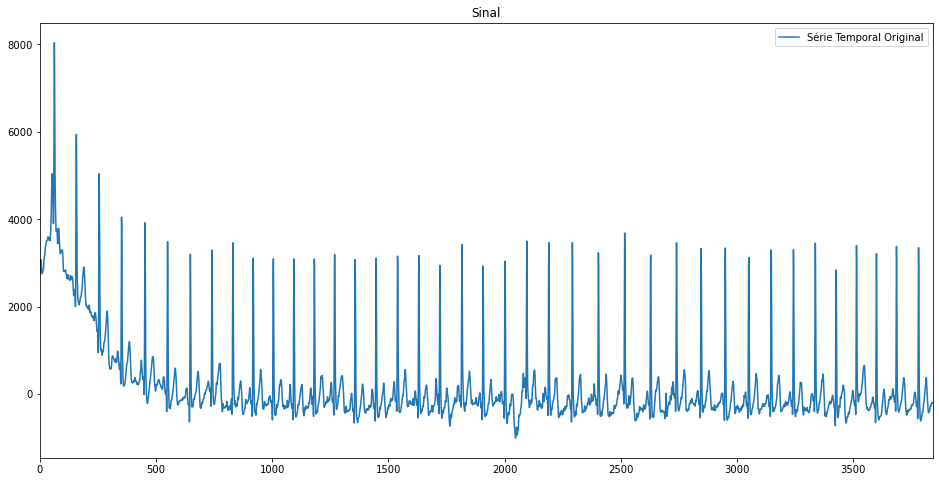

In [5]:
# Open ECG - Movesense signal
f = h5py.File(diretorio + filename, "r")
signal = f['w_signal'][0]

# Plot
plt.figure(figsize=(16, 8))
plt.plot(signal, label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(signal))
plt.title('Sinal')
plt.legend()
plt.show()

# 10 segundos iniciais

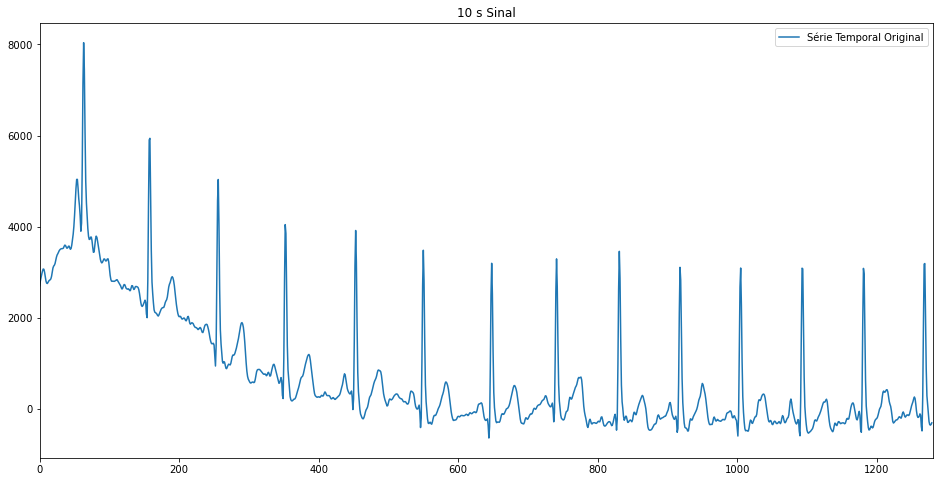

In [6]:
# Trim signal to 10 s (1280 samples)
cut_signal = signal[:1280].reshape(-1,1280,1)
plt.figure(figsize=(16, 8))
plt.plot(cut_signal[0], label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(cut_signal[0]))
plt.title('10 s Sinal')
plt.legend()
plt.show()

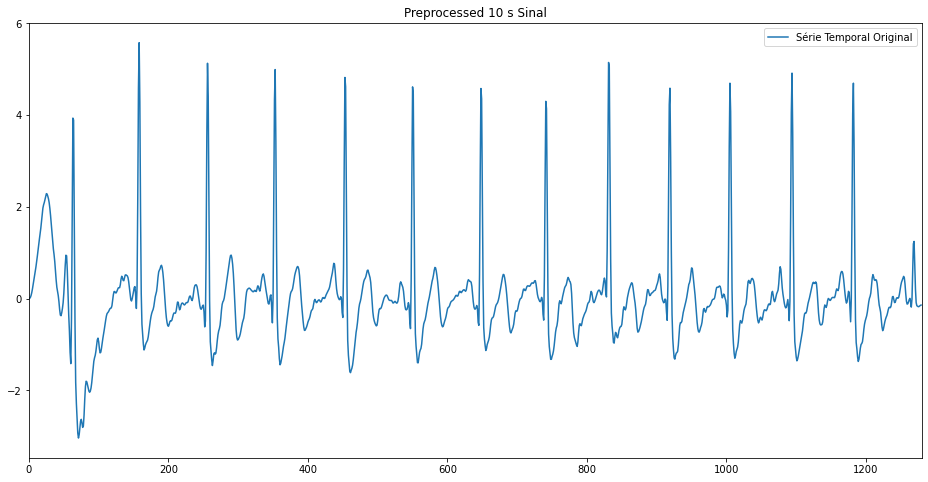

In [7]:
# Preprocessing
signal_preprocessed = preprocess(cut_signal)
plt.figure(figsize=(16, 8))
plt.plot(signal_preprocessed[0], label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(signal_preprocessed[0]))
plt.title('Preprocessed 10 s Sinal')
plt.legend()
plt.show()

In [8]:
df_media, df_mediana = func_filtros(cut_signal[0,:,0], ordem_movel = 60)

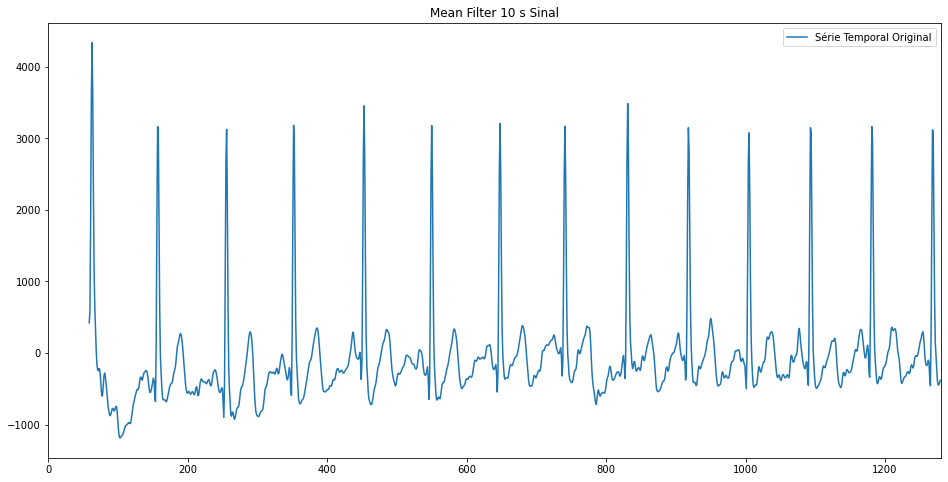

In [9]:
# Mean Filter
signal_preprocessed = preprocess(cut_signal)
plt.figure(figsize=(16, 8))
plt.plot(df_media, label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(df_media))
plt.title('Mean Filter 10 s Sinal')
plt.legend()
plt.show()

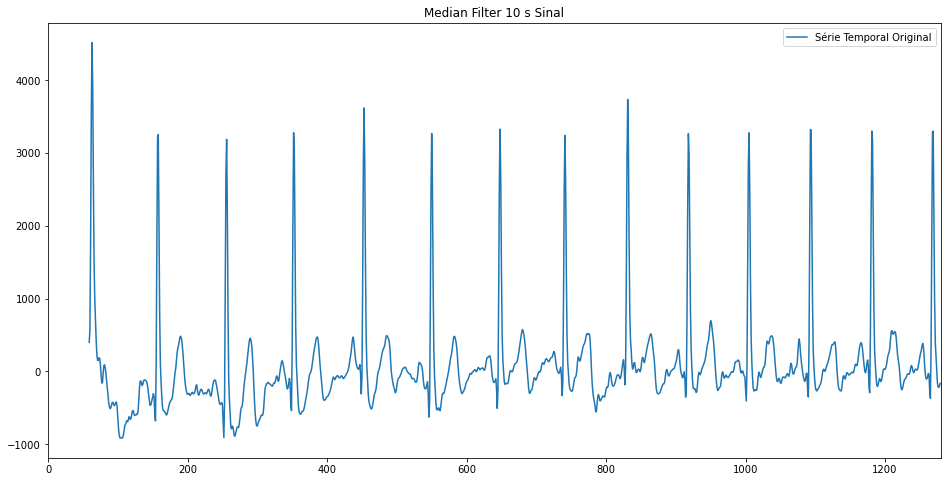

In [10]:
# Median Filter
signal_preprocessed = preprocess(cut_signal)
plt.figure(figsize=(16, 8))
plt.plot(df_mediana, label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(df_mediana))
plt.title('Median Filter 10 s Sinal')
plt.legend()
plt.show()

JANELA 10 pontos


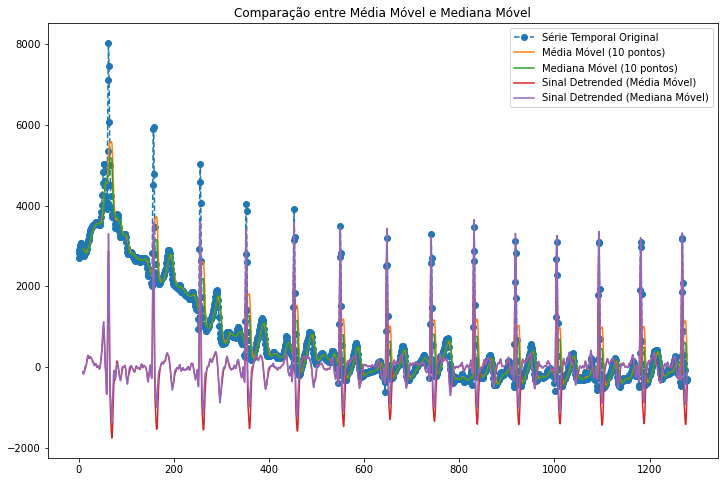

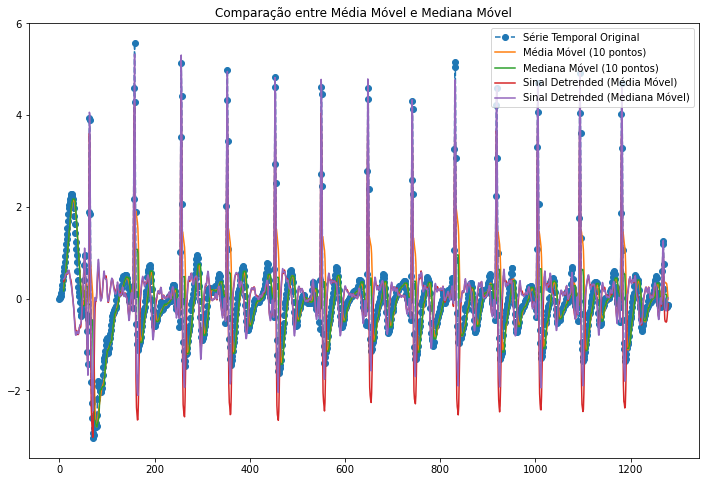

JANELA 20 pontos


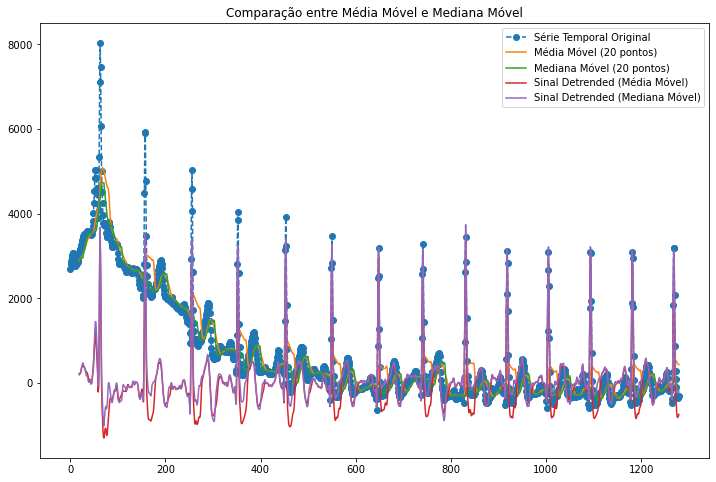

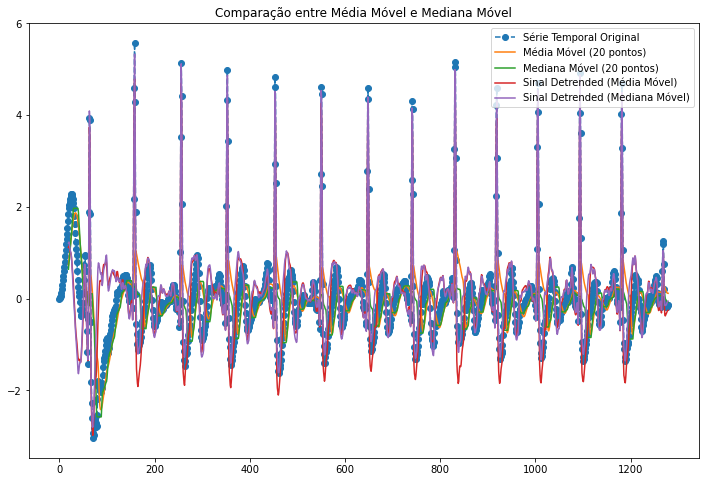

JANELA 30 pontos


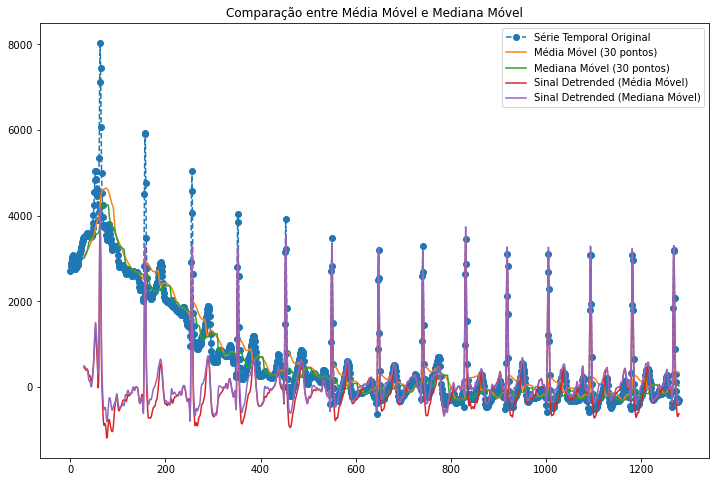

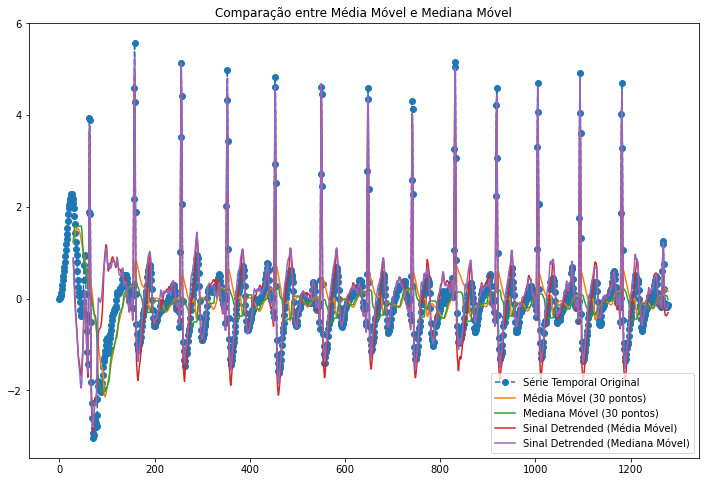

JANELA 60 pontos


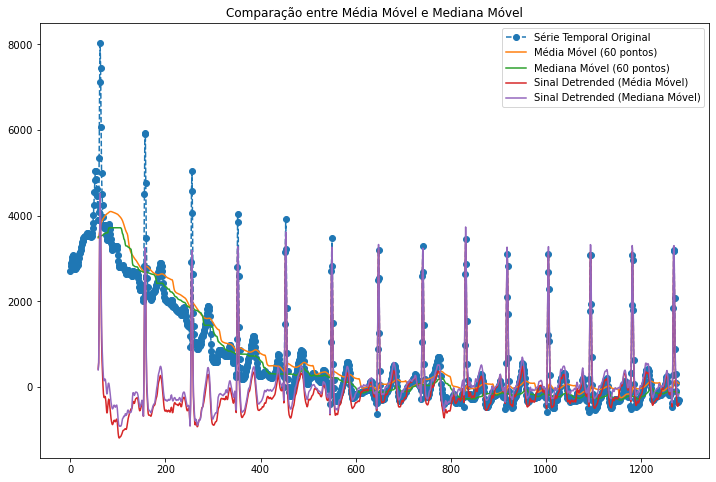

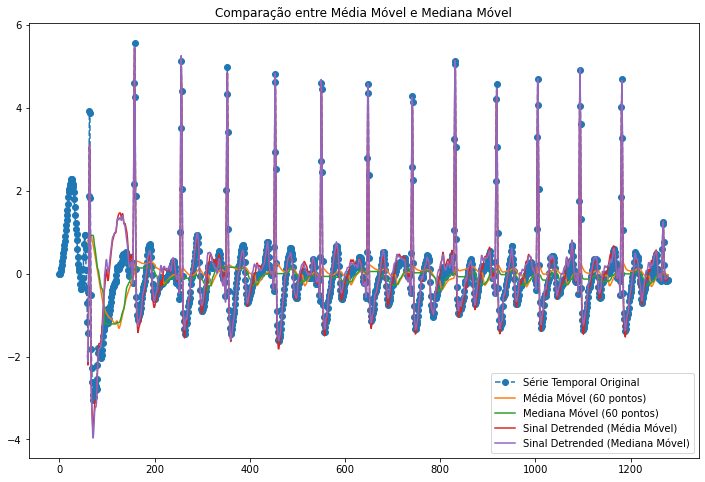

JANELA 100 pontos


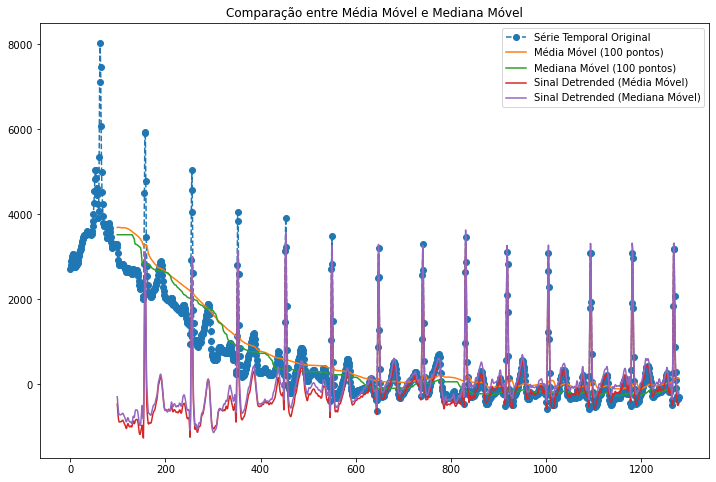

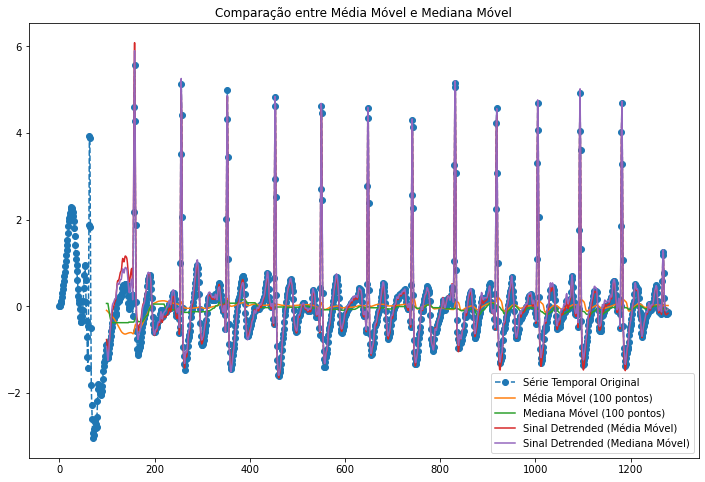

JANELA 120 pontos


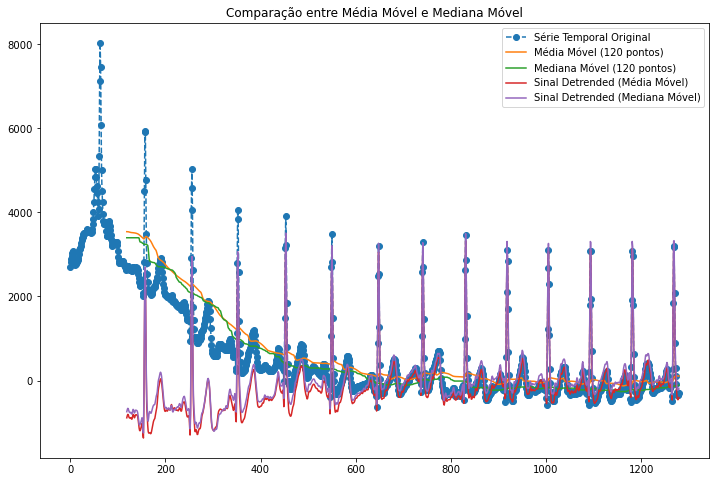

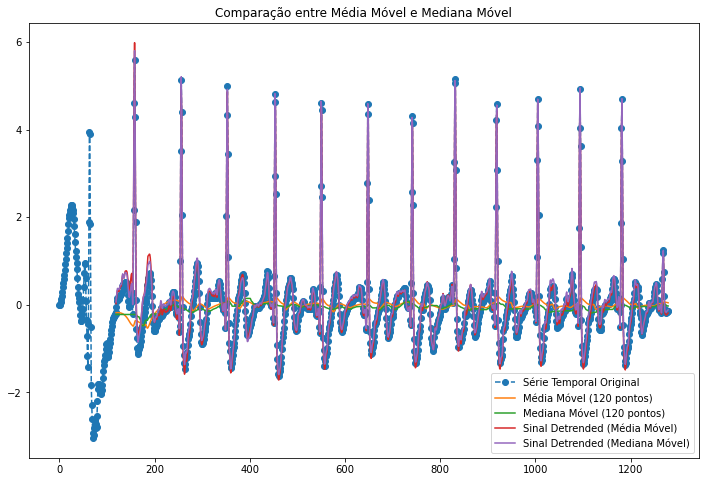

In [11]:
ordem_movel = [10, 20, 30, 60, 100, 120]

for i in ordem_movel:
    print('===================================')
    print(f'JANELA {i} pontos')
    func_filtros(cut_signal[0,:,0], i, True)
    func_filtros(signal_preprocessed[0,:,0], i, True)

# 10 segundos Finais

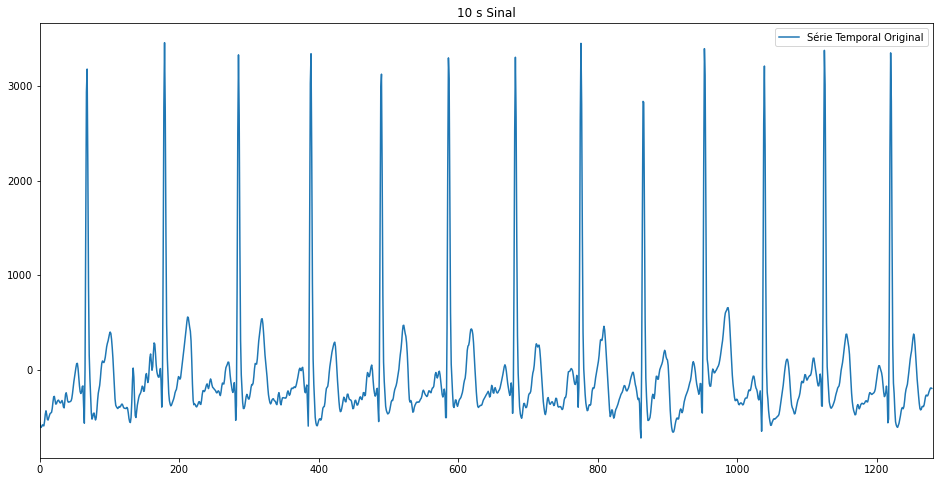

In [15]:
# Trim signal to 10 s (1280 samples)
cut_signal = signal[1280*2:].reshape(-1,1280,1)
plt.figure(figsize=(16, 8))
plt.plot(cut_signal[0], label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(cut_signal[0]))
plt.title('10 s Sinal')
plt.legend()
plt.show()

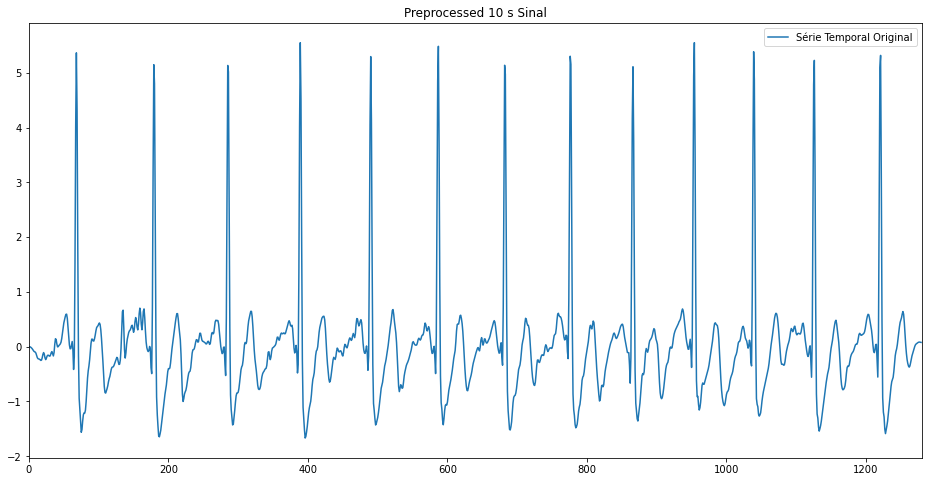

In [16]:
# Preprocessing
signal_preprocessed = preprocess(cut_signal)
plt.figure(figsize=(16, 8))
plt.plot(signal_preprocessed[0], label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(signal_preprocessed[0]))
plt.title('Preprocessed 10 s Sinal')
plt.legend()
plt.show()

In [17]:
df_media, df_mediana = func_filtros(cut_signal[0,:,0], ordem_movel = 60)

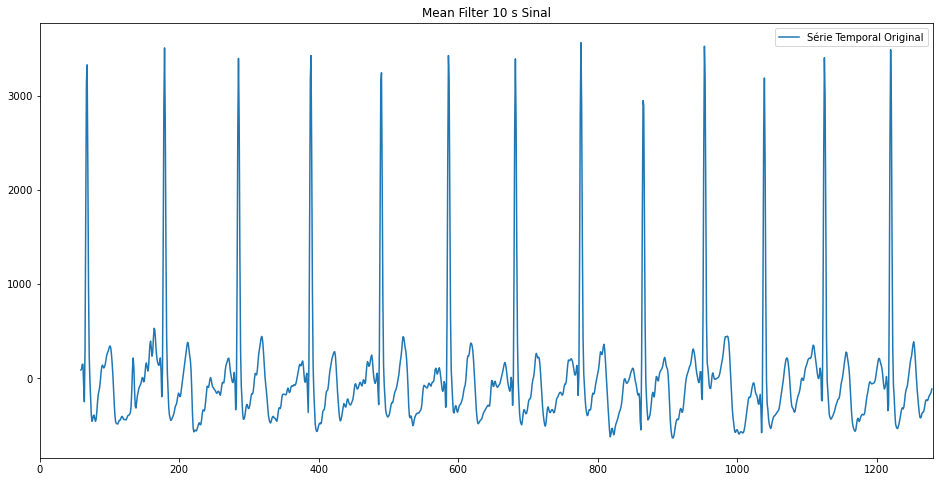

In [18]:
# Mean Filter
signal_preprocessed = preprocess(cut_signal)
plt.figure(figsize=(16, 8))
plt.plot(df_media, label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(df_media))
plt.title('Mean Filter 10 s Sinal')
plt.legend()
plt.show()

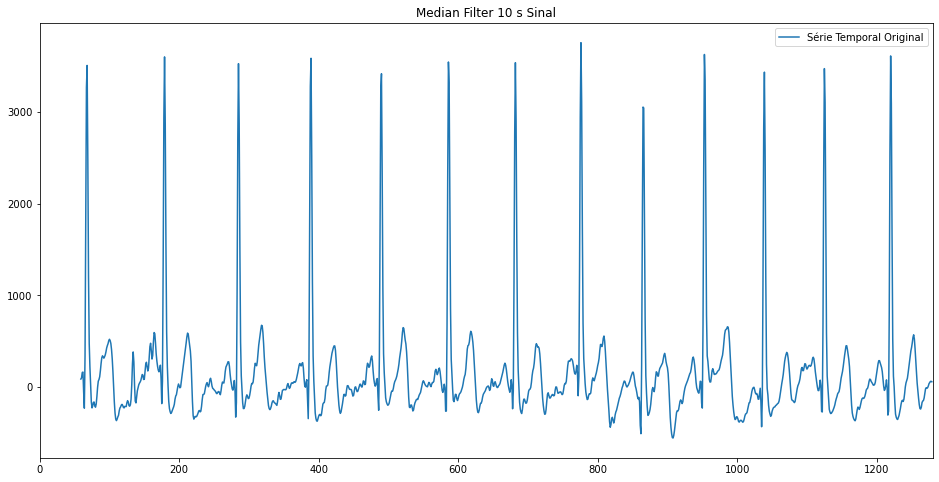

In [19]:
# Median Filter
signal_preprocessed = preprocess(cut_signal)
plt.figure(figsize=(16, 8))
plt.plot(df_mediana, label='Série Temporal Original', linestyle='-')
plt.xlim(0, len(df_mediana))
plt.title('Median Filter 10 s Sinal')
plt.legend()
plt.show()